Write a program using tensorflow to build a stochastic gradient descent model for linear regression

Part 1
1. Co-effiecients m &c for y=mx+c are calculated for given values from previous assignment
2. Start with 0 (zero ) value for  m & c .
3. Using cost function 
$$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$
where $(h_\beta(x^{(i)})$ is prediction for present iteration
$y^{(i)}$ is the prediction obtained from y=mx+c value
4. Find the values of m & c by updating the values with learning rate of 0.005, 0.0005 etc and epoch value 100,500,1000



Part 2
1. Display the graph of decreasing cost function wrt learning rate and epoch
2. Compare time complexity of tensorflow api and user defined function
3. Start with random values of m & c . Analyse best approach for initial values of m & c.


In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

import matplotlib.pyplot as plt
learning_rate = 0.0001
training_epochs = 1000
display_step = 50

In [3]:
with tf.name_scope("Creation_of_array"):
    x_array=np.asarray([1.0,9.4,3.32,0.88,-2.23,1.11,0.57,-2.25,-3.31,6.45])
    y_array=np.asarray([1.22,0.24,-0.08,2.25,4.41,3.09,-6.66,-9.77,0.001,2.25])
    x = tf.constant(x_array,dtype = tf.float32,name = "x_array")
    y = tf.constant(y_array,dtype = tf.float32, name= "y_array")
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y, name = "mean_y")
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)

-0.3049


In [4]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0], name = "mean_x_and_variance_x")
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)


1.494
14.2987


In [5]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(x_array,y_array,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(x_array[i],x_mean, name="Finding_difference_of_xval_and_mean")
            y_val = tf.subtract(y_array[i],y_mean, name="Finding_difference_of_yval_and_mean")
            total_val = tf.multiply(x_val,y_val, name="Multiplying_found_values")
            cov = tf.add(cov,total_val, name="Recursive_addition")
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)


3.60367


In [6]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v,name="Finding_slope")
    intm = tf.multiply(slope,m,name = "Intermediate_step")
    c_intm = tf.subtract(result_y,intm,name = "Finding_c")

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)


0.252027
-0.681428


In [ ]:

###Part-2: Plotting graph for actual values against predicted values

Epoch: 0050 cost= 10.651758194 W= -0.196512 b= 1.16332
Epoch: 0100 cost= 10.544446945 W= -0.174125 b= 1.15738
Epoch: 0150 cost= 10.451741219 W= -0.15347 b= 1.15131
Epoch: 0200 cost= 10.371421814 W= -0.134411 b= 1.14512
Epoch: 0250 cost= 10.301595688 W= -0.11682 b= 1.13882
Epoch: 0300 cost= 10.240667343 W= -0.100579 b= 1.13243
Epoch: 0350 cost= 10.187287331 W= -0.0855801 b= 1.12595
Epoch: 0400 cost= 10.140314102 W= -0.071725 b= 1.1194
Epoch: 0450 cost= 10.098775864 W= -0.0589222 b= 1.11279
Epoch: 0500 cost= 10.061857224 W= -0.0470878 b= 1.10612
Epoch: 0550 cost= 10.028850555 W= -0.0361442 b= 1.09939
Epoch: 0600 cost= 9.999180794 W= -0.0260208 b= 1.09261
Epoch: 0650 cost= 9.972352982 W= -0.0166519 b= 1.0858
Epoch: 0700 cost= 9.947941780 W= -0.00797747 b= 1.07896
Epoch: 0750 cost= 9.925577164 W= 5.77694e-05 b= 1.07208
Epoch: 0800 cost= 9.904972076 W= 0.0075048 b= 1.06519
Epoch: 0850 cost= 9.885873795 W= 0.0144104 b= 1.05827
Epoch: 0900 cost= 9.868056297 W= 0.0208177 b= 1.05134
Epoch: 0950

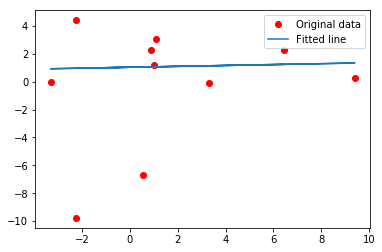

In [7]:
with tf.name_scope("Plotting"):
    n_samples = x_array.shape[0]
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)


    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (p, r) in zip(x_array, y_array):
                sess.run(optimizer, feed_dict={X: p, Y: r})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: x_array, Y:y_array})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: x_array, Y: y_array})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        # Graphic display
        plt.plot(x_array, y_array, 'ro', label='Original data')
        plt.plot(x_array, sess.run(W) * x_array + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

In [8]:
###root mean square error
with tf.name_scope("Finding_root_mean_square_error"):
    rms = tf.sqrt(tf.reduce_mean(tf.squared_difference(x_array, y_array,name = "Finding_squared_difference"),name="Finding_mean"),name = "Finding_square_root")
    with tf.Session() as sess:
        rmse=sess.run(rms)
        print(rmse)

5.3181474312


In [9]:
with tf.name_scope("Finding_theta_1"): 
    y_var = tf.subtract(y,result_y,name = "Subtract_y_array_with_y_mean")
    x_var = tf.subtract(x,m,name = "Subtract_x_array_with_x_mean")
    mult = tf.multiply(x_var,y_var,name = "Multiply_calculated_arrays")
    sumn = tf.reduce_sum(mult,name = "Find_sum_of_x_i_minus_mean_x_and_y_i_minus_mean_y")
    x_var2 = tf.multiply(x_var,x_var,name = "Squaring_found_arrray_values")
    sumd = tf.reduce_sum(x_var2,name = "Find_sum_of_array_of_x_i_minus_mean_x")
    val = sumn/sumd

    with tf.Session() as sess:
        res = sess.run(val)
        print(res)



0.252027


In [10]:
with tf.name_scope("Finding_theta_0"):    
    temp = tf.multiply(res,m,name = "Multiply_res_with_slope")
    theta = tf.subtract(result_y,temp,name="Sub_obtained_res_with_mean_y")
    with tf.Session() as sess:
        theta0 = sess.run(theta)
        print(theta0)


-0.681428


In [11]:
with tf.name_scope("Finding_predictions"):
    mx = tf.multiply(res,x,name = "Multiply_res_with_x_array")
    y_temp = tf.add(mx,theta0,name = "Add_m_multiplied_x_array_with_c")
    with tf.Session() as sess:
        y_new = sess.run(y_temp)
        print(y_new)

[-0.42940134  1.68762565  0.15530139 -0.45964459 -1.24344873 -0.40167835
 -0.53777295 -1.24848914 -1.51563787  0.94414598]


In [12]:
t_minus = tf.subtract(y_new,y,name = "Sub_new_preds_with_original_y")
t_squared = tf.multiply(t_minus,t_minus,name= "Square_obtained_res")
t_sum = tf.reduce_sum(t_squared,name="Find_array_sum")
j_theta = tf.div(t_sum,20,name="Divide_by_no_of_elements")
with tf.Session() as sess:
    print(sess.run(j_theta))

8.52351


In [13]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/output_regg2", sess.graph)
    print(sess.run(j_theta))
    writer.close()

8.52351
